In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [34]:
data = pd.read_csv("./Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [35]:
# Convert DataFrame to NumPy array
X = data[["Annual Income (k$)","Spending Score (1-100)"]].values

In [26]:
def custom_kmeans(X, k, max_iters=100):
    np.random.seed(42)
    
    # Initialize cluster centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for iter in range(max_iters):
        # Assign data points to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        
        # Update centroids as the mean of data points in each cluster
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.allclose(centroids, new_centroids, rtol=1e-4):
            break
        
        centroids = new_centroids
    
    return centroids, labels

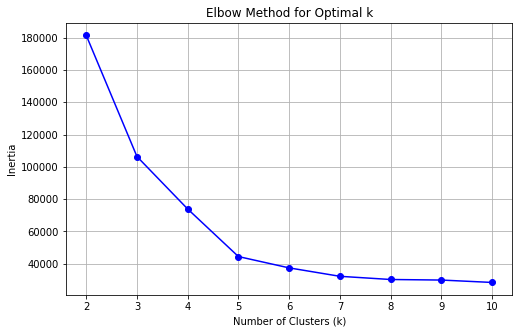

In [36]:
k_values = range(2, 11)
inertia_values = []

for k in k_values:
    centroids, labels = custom_kmeans(X, k)
    inertia = np.sum(((X - centroids[labels])**2))
    inertia_values.append(inertia)

# Plot the elbow chart
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid()
plt.show()

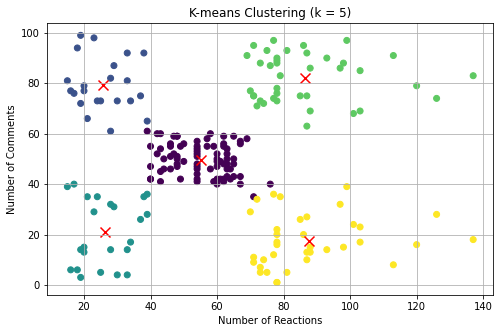

In [37]:
optimal_k = 5
centroids, cluster_labels = custom_kmeans(X, optimal_k)

# Plot the scatter plot of the clustering
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.xlabel('Number of Reactions')
plt.ylabel('Number of Comments')
plt.title('K-means Clustering (k = {})'.format(optimal_k))
plt.grid()
plt.show()

In [38]:
silhouette_avg = silhouette_score(X, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.55
